In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

'1.14.0'

In [0]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape(-1, 784)
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 784)
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

label = 3


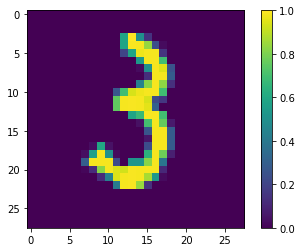

In [3]:
index = 1234
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28))
plt.colorbar()
#plt.gca().grid(False)
plt.show()

In [0]:
model = tf.keras.models.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
# Add another:
model.add(layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(1e-4),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [6]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.08076067 0.08981397 0.07522254 0.10673703 0.14714552 0.09686546
  0.1254197  0.10595889 0.0837562  0.08832003]]


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  50240     
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
batch_size = 32
max_epochs = 10

# using `numpy type` data
history = model.fit(train_data, train_labels,
                    batch_size=batch_size, epochs=max_epochs,
                    validation_split=0.05)
# using `tf.data.Dataset`
#history = model.fit(train_dataset, epochs=max_epochs,
#                    steps_per_epoch=int(len(train_data) / batch_size))

W0629 06:40:15.451570 140380645762944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 57000 samples, validate on 3000 samples
Epoch 1/10
57000/57000 [==============================] - 5s 89us/sample - loss: 1.1410 - acc: 0.6455 - val_loss: 0.3704 - val_acc: 0.9167
Epoch 2/10
57000/57000 [==============================] - 5s 85us/sample - loss: 0.5790 - acc: 0.8287 - val_loss: 0.2569 - val_acc: 0.9330
Epoch 3/10
57000/57000 [==============================] - 5s 83us/sample - loss: 0.4694 - acc: 0.8625 - val_loss: 0.2081 - val_acc: 0.9453
Epoch 4/10
57000/57000 [==============================] - 5s 84us/sample - loss: 0.4147 - acc: 0.8777 - val_loss: 0.1823 - val_acc: 0.9523
Epoch 5/10
57000/57000 [==============================] - 5s 86us/sample - loss: 0.3765 - acc: 0.8892 - val_loss: 0.1692 - val_acc: 0.9543
Epoch 6/10
57000/57000 [==============================] - 5s 83us/sample - loss: 0.3470 - acc: 0.8975 - val_loss: 0.1552 - val_acc: 0.9590
Epoch 7/10
57000/57000 [==============================] - 5s 82us/sample - loss: 0.3293 - acc: 0.9015 - val_loss: 0.1

In [9]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

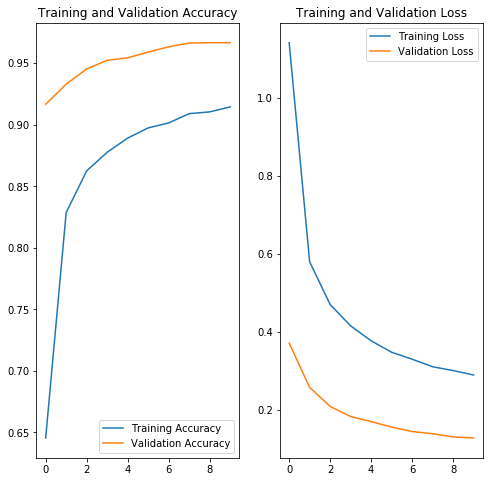

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
results = model.evaluate(test_data, test_labels, batch_size=batch_size)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.1701 - acc: 0.9503


In [12]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.170
accuracy value: 95.0300%


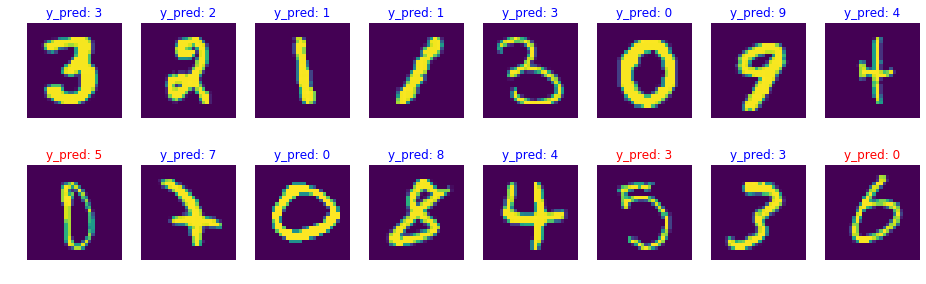

In [13]:
np.random.seed(219)
test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  if np.argmax(py) == batch_ys[i]:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='blue')
  else:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='red')
  p.imshow(px.reshape(28, 28))
  p.axis('off')